# Assignment 7: Linear regression - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as so
import pandas as pd
import numpy as np

## Task 1: Scatterplots
### Question 1.1 (8pts)
Load the data file and make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. 

Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

Text(0, 0.5, 'Head Length')

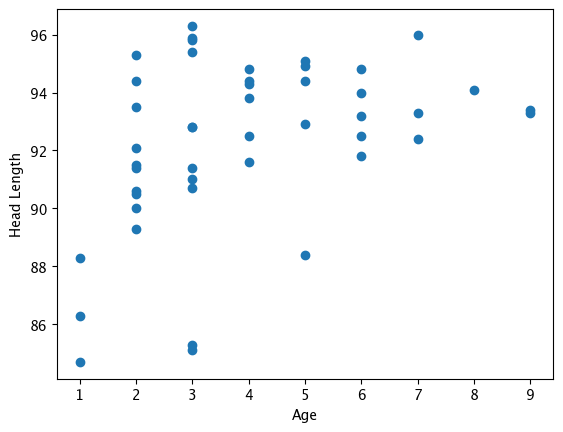

In [6]:
df = pd.read_csv("possum.csv")

plt.scatter(x=df['age'], y=df['headL'])
plt.xlabel("Age")
plt.ylabel("Head Length")

Yes there is a relationship between the two variables. The relationship is positive, mostly linear, and has a few outliers.

### Question 1.2 (8pts)
Make a scatter plot between head size and skull width. 

Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? 

Text(0, 0.5, 'Skull Width')

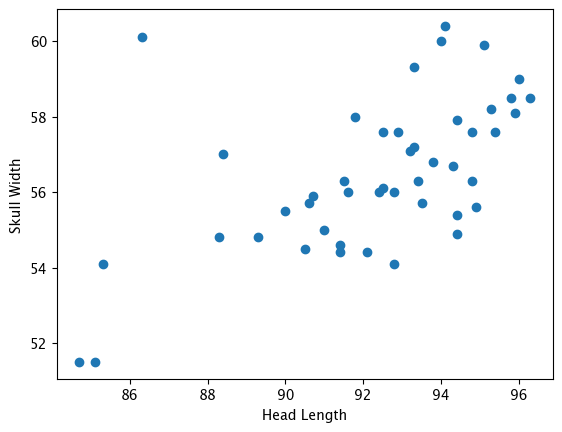

In [9]:
plt.scatter(x=df['headL'], y=df['skullW'])
plt.xlabel("Head Length")
plt.ylabel("Skull Width")

Yes there is a relationship between the two variables. The relationship is positive and linear. There are a few outliers.

## Task 2 Fit a linear regression line "by hand"
### Question 2.1 (10pts)
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture, step 1). 

Call the function using b=[83,2] as parameters and to predict the value for x=2. Report the predicted value. 


In [14]:
def simpleRegPredict(b, x):
    yp = b[0] + x * b[1]
    return yp

In [21]:
b = [83, 2]
x = 2
print(simpleRegPredict(b, x))

87


### Question 2.2 (10pts)
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture step 4). Call the function for x being the age, y=headL, and b=[83,2].

In [36]:
def plotPrediction(b, x, y, fcn=simpleRegPredict):
    plt.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = fcn(b, xp)
    return plt.plot(xp, yp, 'r')


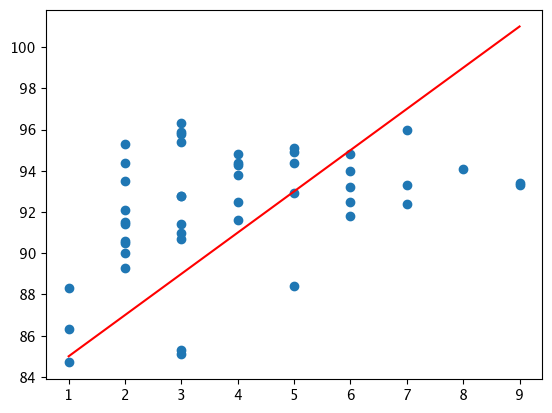

In [37]:
x = df['age']
y = df['headL']
b = [83, 2]

plotPrediction(b, x, y)

### Question 2.3 (10pts)
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (gradient - see lecture step 2). The function should use your function simpleRegPred. 

Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative (gradient)? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [54]:
def simpleRegLossRSS(b, x, y, fcn=simpleRegPredict):
    deriv = [0,0]

    yp = fcn(b, x)
    residual = (y - yp)
    RSS = np.sum(residual ** 2)
    deriv[0] = -2 * np.sum(residual)
    deriv[1] = -2 * np.sum(residual * x)

    return RSS, deriv

In [68]:
b = [83, 2]
x = df['age']
y= df['headL']

print(simpleRegLossRSS(b, x, y))

(np.float64(818.39), [np.float64(-128.6), np.float64(54.19999999999993)])


deriv[0] is the intercept, deriv[1] is the slope
To minimize the loss, increase the intercept and decrease the slope

### Question 2.4 (10pts)
Use the answer from Q 2.3, and try two things: 

* Try to reduce the slope value and try parameter values b=[83,0.6]. 
* Then increase the intercept and try b=[89,0.6]. 

For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2.2 and 2.3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? 

Finally, play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

(np.float64(2537.87), [np.float64(-638.1999999999999), np.float64(-2510.6)])


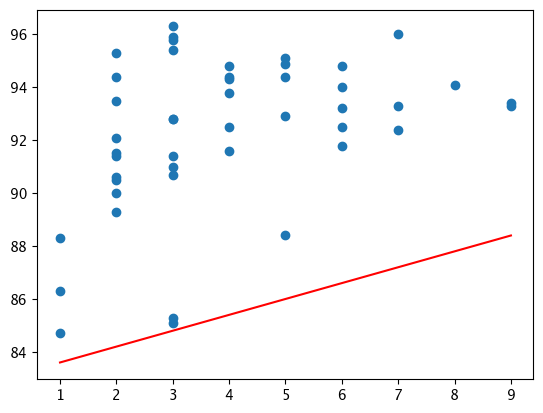

In [64]:
# First parameter setting
b = [83, 0.6]
x = df['age']
y= df['headL']

print(simpleRegLossRSS(b, x, y))
plotPrediction(b, x, y)

Both the derrivatives value became more negative. The value of both the parameters should increase.

(np.float64(364.66999999999985), [np.float64(-86.19999999999999), np.float64(-326.5999999999999)])


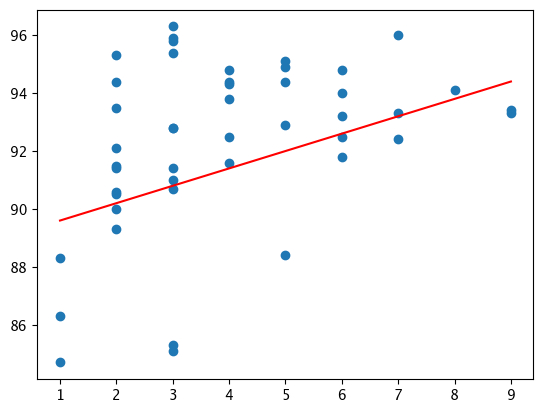

In [70]:
# Second parameter setting
b = [89, 0.6]
x = df['age']
y= df['headL']

print(simpleRegLossRSS(b, x, y))
plotPrediction(b, x, y)

This fit provides the lowest RSS. Although both the derivatives increased in the positive direction, they are still negative. Both parameters should be increased.

(np.float64(324.0884000000002), [np.float64(-1.4800000000001603), np.float64(0.7599999999997351)])


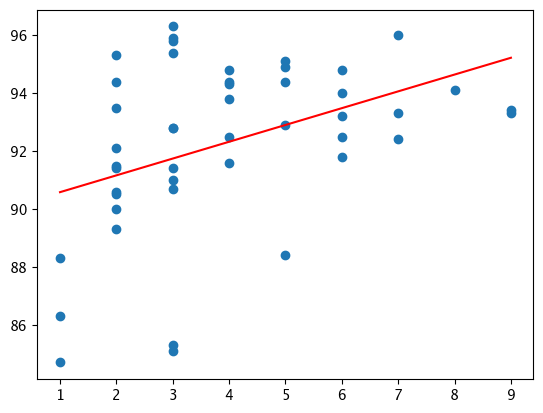

In [82]:
# Try other parameter settings
b = [90, 0.58]
x = df['age']
y= df['headL']

print(simpleRegLossRSS(b, x, y))
plotPrediction(b, x, y)

These parameters provide an RSS of less than 350.

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 3.1 (10pts)
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. See Lecture, step 3. As starting values simply give b0=[0,0]
Show the result structure. 

Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [86]:
loss_fcn = simpleRegLossRSS

b0 = np.zeros(2)
x = df['age']
y= df['headL']

RESULT = so.minimize(loss_fcn, b0, args = (x, y), jac = True)

RESULT

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 324.02064580559266
        x: [ 9.008e+01  5.631e-01]
      nit: 7
      jac: [-3.894e-12 -3.004e-11]
 hess_inv: [[ 5.082e-02 -1.010e-02]
            [-1.010e-02  2.552e-03]]
     nfev: 9
     njev: 9

The estimated parameter value for intercept and slope are intercept: 90.08 and slope: 0.56

### Question 3.2 (8pts)
Use your function plotPrediction (from above) to plot this best linear fit between age and head length (see Lecture step 4). 

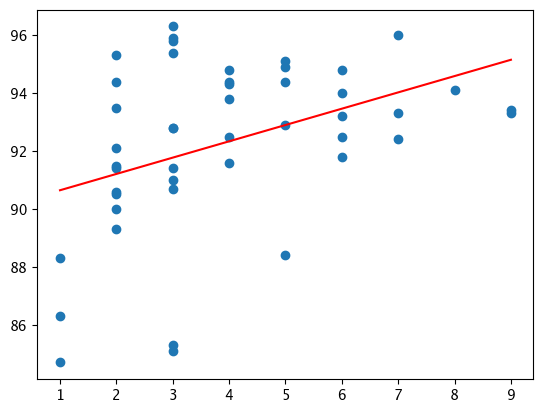

In [89]:
x = df['age']
y= df['headL']
b = RESULT.x
plotPrediction(b, x, y)


### Question 3.3 (8pts)
Calculate the *total* sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

Then use the total-sum-of-squares and the residual-sum-of-squares to calculate the R-squared value.

In [94]:
RSS = simpleRegLossRSS(b, x, y)[0]

TSS = sum((y - np.mean(y))**2)
print(f"TSS: {TSS}")
R2 = 1 - (RSS/TSS)
print(f"R2: {R2}")

TSS: 386.14456521739135
R2: 0.16088254246650913


The total sum of squares for headL is 386.14

### Question 3.4 (10pts)
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

np.float64(0.16088254246650913)

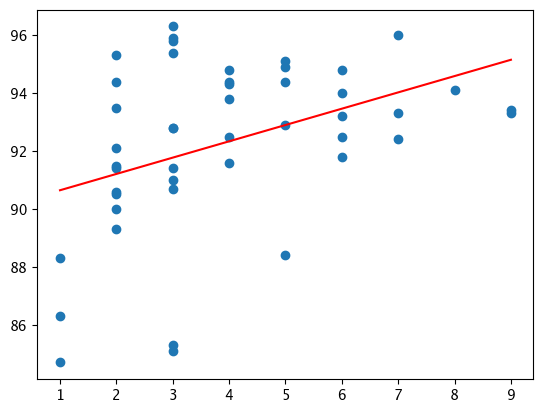

In [97]:
def simpleRegFit(x, y, fcn=simpleRegLossRSS):
    b0 = np.zeros(2)

    # (a)
    RESULT = so.minimize(fcn, b0, args = (x, y), jac = True)
    b = RESULT.x

    # (b)
    plotPrediction(b, x, y)

    # (c)
    RSS = simpleRegLossRSS(b, x, y)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    return R2

x = df['age']
y= df['headL']

simpleRegFit(x, y)

The R2 value of 0.16 is low. This means 16% of the variance in teh dependent variable can be expalined by the independant variables.

### Question 3.5 (8pts)
Fit a linear model between age (x) and tail length (y). How good is the fit (i.e. report the R2)? 

Thought question for next lecture:
Are there outliers? How much would the slope of the line change if you excluded the outlier?  

np.float64(0.2228658794760412)

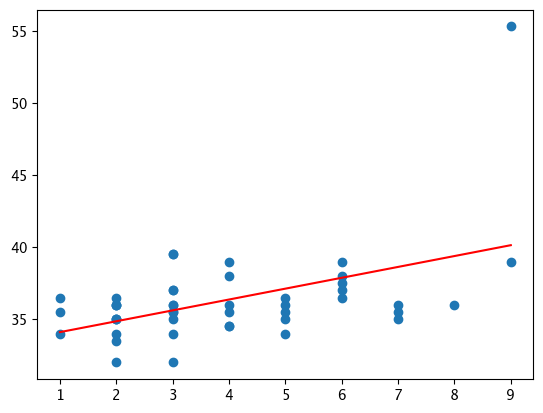

In [98]:
x = df['age']
y= df['tailL']

simpleRegFit(x, y)

The R2 value is 0.22 this is better than the R2 value of 0.16 for the head length.